In [50]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow.keras import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

import numpy as np
import random

import matplotlib.pyplot as plt

In [51]:
# This should print something along the lines of '2.0.0-rc1'
tf.__version__

'2.4.0'

In [52]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [53]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [54]:
# Cifar100
# labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
#                 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
#                 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
#                 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
#                 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
#                 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
#                 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
#                 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
#                 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
#                 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
#                 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
#                 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
#                 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
#                 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
#                 'worm']

# Cifar10
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# MNIST
# labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

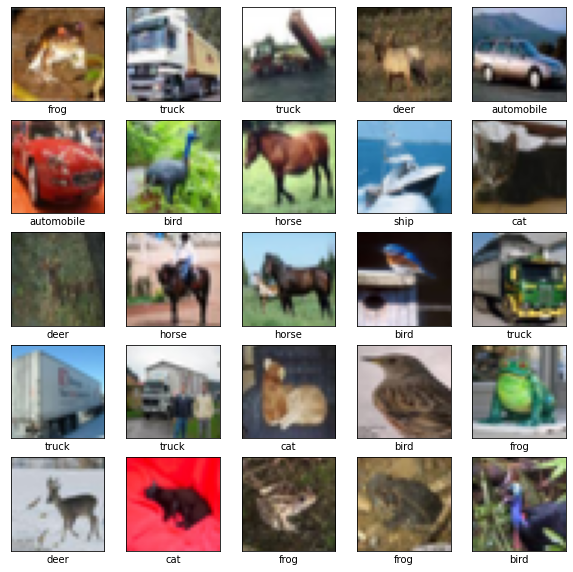

In [55]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i][0]])
plt.show()

In [56]:
# Pre-process data
img_rows, img_cols, channels = 32, 32, 3
num_classes = 10

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape((-1, img_rows, img_cols, channels))
x_test = x_test.reshape((-1, img_rows, img_cols, channels))

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)

Data shapes (10000, 32, 32, 3) (10000, 10) (50000, 32, 32, 3) (50000, 10)


In [57]:
print(y_train, y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] (50000, 10)


In [70]:
# Create model
def create_model():
    model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', 
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    
    return model

In [71]:
# Create and fit model
model = create_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)              

In [72]:
model.fit(x_train, y_train,
#           batch_size=32,
          epochs=30,
          validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 25s 16ms/step - loss: 1.8155 - accuracy: 0.3254 - val_loss: 1.3924 - val_accuracy: 0.5102
Epoch 2/30
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2606 - accuracy: 0.5508 - val_loss: 1.1722 - val_accuracy: 0.5905
Epoch 3/30
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1028 - accuracy: 0.6107 - val_loss: 1.0425 - val_accuracy: 0.6360
Epoch 4/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9870 - accuracy: 0.6531 - val_loss: 0.9906 - val_accuracy: 0.6549
Epoch 5/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9111 - accuracy: 0.6846 - val_loss: 0.9337 - val_accuracy: 0.6762
Epoch 6/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8596 - accuracy: 0.6994 - val_loss: 0.9376 - val_accuracy: 0.6705
Epoch 7/30
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8057 - accuracy: 0.7183 - val_loss: 0.9053 -

In [73]:
# Assess base model accuracy on regular images
print("Base accuracy on regular images:", model.evaluate(x=x_test, y=y_test, verbose=0))

Base accuracy on regular images: [1.3477715253829956, 0.6931999921798706]


In [74]:
# Function to create adversarial pattern
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog
cat


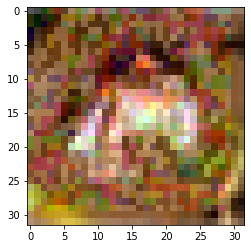

In [75]:
# Create a signle adversarial example
image = x_train[0]
image_label = y_train[0]
perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
adversarial = image + perturbations * 0.1

print(labels[model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print(labels[model.predict(adversarial).argmax()])

if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))
plt.show()

In [76]:
# Adversarial data generator
def generate_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 100)

            label = y_train[N]
            image = x_train[N]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            
            
            epsilon = 0.1
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(y_train[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: airplane , Truth: truck


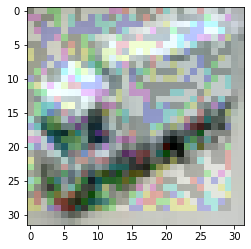

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: ship , Truth: airplane


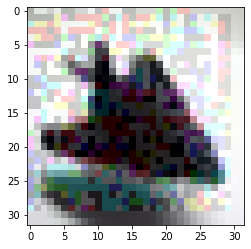

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: horse , Truth: automobile


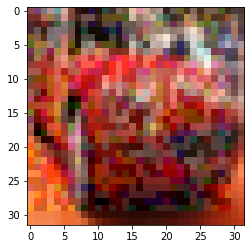

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: frog , Truth: horse


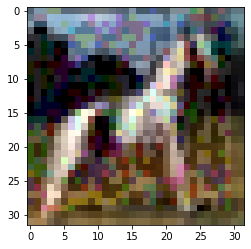

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: horse , Truth: deer


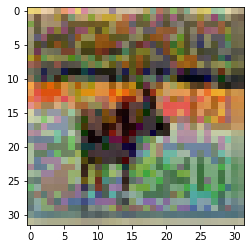

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: frog , Truth: cat


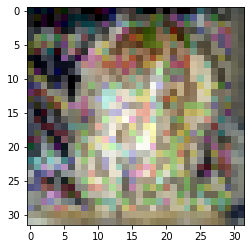

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: airplane , Truth: truck


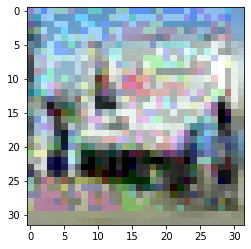

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: dog , Truth: cat


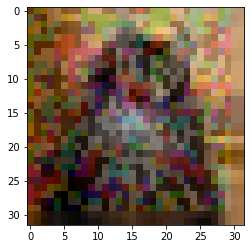

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: truck , Truth: automobile


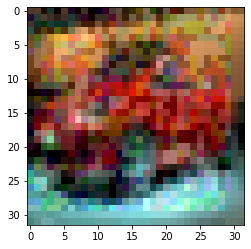

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: dog , Truth: cat


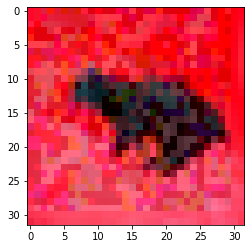

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: truck , Truth: automobile


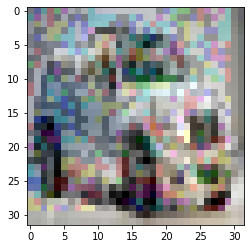

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: dog , Truth: deer


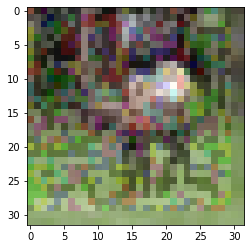

In [77]:
# Generate and visualize 12 adversarial images
adversarials, correct_labels = next(generate_adversarials(12))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], ', Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

In [24]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
x_adversarial_train, y_adversarial_train = next(generate_adversarials(20000))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))

In [25]:
# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [2.717082977294922, 0.5117999911308289]


In [26]:
# Learn from adversarial data
model.fit(x_adversarial_train, y_adversarial_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0373 - accuracy: 0.9919 - val_loss: 0.3108 - val_accuracy: 0.9557
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.3383 - val_accuracy: 0.9534
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.3557 - val_accuracy: 0.9525
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 7.2318e-04 - accuracy: 0.9997 - val_loss: 0.4197 - val_accuracy: 0.9496
Epoch 5/10
625/625 [==============================] - 2s 2ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.4862 - val_accuracy: 0.9391
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 0.4269 - val_accuracy: 0.9491
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.4565 - val_accuracy: 0.9478
Ep

In [27]:
# Assess defended model on adversarial data
print("Defended accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

# Assess defended model on regular data
print("Defended accuracy on regular images:", model.evaluate(x=x_test, y=y_test, verbose=0))

Defended accuracy on adversarial images: [0.0, 1.0]
Defended accuracy on regular images: [0.5767569541931152, 0.9452999830245972]


In [28]:
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))
print("Defended accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Defended accuracy on adversarial images: [1.3272665739059448, 0.821399986743927]
